In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
CCBL = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\credit_card_balance.csv")

In [3]:
CCBL

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00","2,250.00",...,"64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0,87788
1,2582071,-82,"16,809.21",67500,0.00,0.00,0.00,0.00,"3,375.00","9,000.00",...,"16,809.21",0.00,0,0.00,0.00,18.00,Active,0,0,87788
2,2582071,-84,"27,577.89",67500,0.00,0.00,0.00,0.00,"3,375.00","4,500.00",...,"27,577.89",0.00,0,0.00,0.00,16.00,Active,0,0,87788
3,2582071,-7,"65,159.24",45000,0.00,0.00,0.00,0.00,"2,250.00","2,250.00",...,"65,609.24",0.00,0,0.00,0.00,63.00,Active,0,0,87788
4,2582071,-59,"70,475.85",67500,"24,750.00","24,750.00",0.00,0.00,"3,375.00","4,500.00",...,"70,475.85",4.00,4,0.00,0.00,41.00,Active,0,0,87788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.00,202500,NaN,0.00,NaN,NaN,0.00,NaN,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,259579
3227961,2339982,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,NaN,...,0.00,0.00,0,0.00,0.00,0.00,Active,0,0,220697
3227962,2720102,-1,0.00,225000,NaN,0.00,NaN,NaN,0.00,NaN,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,93573
3227963,1897864,-2,0.00,270000,NaN,0.00,NaN,NaN,0.00,NaN,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,11072


In [4]:
CCBL.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00","2,250.00",...,"64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0,87788
1,2582071,-82,"16,809.21",67500,0.00,0.00,0.00,0.00,"3,375.00","9,000.00",...,"16,809.21",0.00,0,0.00,0.00,18.00,Active,0,0,87788
2,2582071,-84,"27,577.89",67500,0.00,0.00,0.00,0.00,"3,375.00","4,500.00",...,"27,577.89",0.00,0,0.00,0.00,16.00,Active,0,0,87788
3,2582071,-7,"65,159.24",45000,0.00,0.00,0.00,0.00,"2,250.00","2,250.00",...,"65,609.24",0.00,0,0.00,0.00,63.00,Active,0,0,87788
4,2582071,-59,"70,475.85",67500,"24,750.00","24,750.00",0.00,0.00,"3,375.00","4,500.00",...,"70,475.85",4.00,4,0.00,0.00,41.00,Active,0,0,87788


In [5]:
CCBL.sort_values(by= "SK_ID_CURR")

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
2890867,1745718,-3,"36,569.43",180000,0.00,"56,187.00",0.00,"56,187.00",0.00,"16,650.00",...,"36,569.43",0.00,6,0.00,6.00,0.00,Active,0,0,0
2890860,1745718,-4,0.00,180000,0.00,0.00,0.00,0.00,0.00,488.07,...,0.00,0.00,0,0.00,0.00,0.00,Active,0,0,0
2890861,1745718,-5,0.00,180000,0.00,0.00,0.00,0.00,0.00,488.07,...,0.00,0.00,0,0.00,0.00,0.00,Active,0,0,0
2890862,1745718,-8,"4,500.00",180000,0.00,"4,500.00",0.00,"4,500.00",0.00,NaN,...,"4,500.00",0.00,1,0.00,1.00,0.00,Active,0,0,0
2890866,1745718,-7,0.00,180000,0.00,"2,578.50",0.00,"2,578.50",0.00,"7,771.50",...,0.00,0.00,1,0.00,1.00,0.00,Active,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928489,1147091,-20,0.00,0,0.00,0.00,0.00,0.00,0.00,596.43,...,0.00,0.00,0,0.00,0.00,9.00,Active,0,0,307509
928488,1147091,-39,0.00,0,0.00,0.00,0.00,0.00,0.00,596.43,...,0.00,0.00,0,0.00,0.00,9.00,Active,0,0,307509
928487,1147091,-85,0.00,112500,0.00,0.00,0.00,0.00,0.00,596.43,...,0.00,0.00,0,0.00,0.00,9.00,Active,0,0,307509
928459,1147091,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,596.43,...,0.00,0.00,0,0.00,0.00,9.00,Active,0,0,307509


In [6]:
CCBL.isnull().sum()

SK_ID_PREV                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      605754
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    605754
AMT_DRAWINGS_POS_CURRENT      605754
AMT_INST_MIN_REGULARITY       264384
AMT_PAYMENT_CURRENT           620093
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      605754
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    605754
CNT_DRAWINGS_POS_CURRENT      605754
CNT_INSTALMENT_MATURE_CUM     264384
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
SK_ID_CURR                         0
dtype: int64

In [7]:
CCBL.duplicated().sum()

0

In [8]:
CCBL.isnull().sum()

SK_ID_PREV                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      605754
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    605754
AMT_DRAWINGS_POS_CURRENT      605754
AMT_INST_MIN_REGULARITY       264384
AMT_PAYMENT_CURRENT           620093
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      605754
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    605754
CNT_DRAWINGS_POS_CURRENT      605754
CNT_INSTALMENT_MATURE_CUM     264384
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
SK_ID_CURR                         0
dtype: int64

In [9]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(CCBL)

<Axes: xlabel='Percentage', ylabel='Feature'>

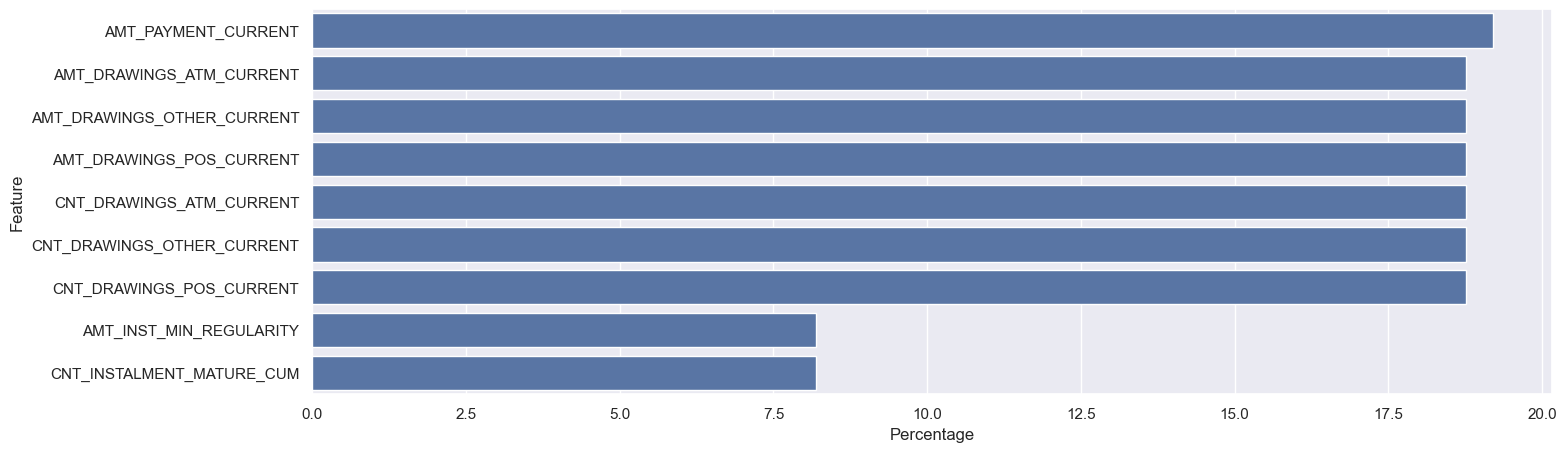

In [10]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [11]:
CCBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [12]:
CCBL.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,"3,227,965.00","1,903,894.10","536,741.49","1,000,018.00","1,431,613.00","1,896,076.00","2,369,259.00","2,843,493.00"
MONTHS_BALANCE,"3,227,965.00",-34.72,26.64,-96.00,-56.00,-28.00,-11.00,-1.00
AMT_BALANCE,"3,227,965.00","59,073.32","106,613.65","-420,250.18",0.00,0.00,"90,405.54","1,354,829.26"
AMT_CREDIT_LIMIT_ACTUAL,"3,227,965.00","152,953.57","163,709.20",0.00,"45,000.00","112,500.00","180,000.00","1,350,000.00"
AMT_DRAWINGS_ATM_CURRENT,"2,622,211.00","6,024.27","28,421.16","-6,827.31",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_CURRENT,"3,227,965.00","7,494.08","33,967.43","-6,211.62",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_OTHER_CURRENT,"2,622,211.00",298.49,"8,396.19",0.00,0.00,0.00,0.00,"1,529,847.00"
AMT_DRAWINGS_POS_CURRENT,"2,622,211.00","2,884.15","20,388.33",0.00,0.00,0.00,0.00,"2,060,030.16"
AMT_INST_MIN_REGULARITY,"2,963,581.00","3,599.68","5,611.74",0.00,0.00,0.00,"6,750.00","202,882.01"
AMT_PAYMENT_CURRENT,"2,607,872.00","10,238.61","35,864.33",0.00,155.70,"2,923.02","9,000.00","4,289,207.45"


In [13]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [14]:
CCBL["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active          96.55
Completed        3.10
Signed           0.31
Demand           0.03
Sent proposal    0.01
Refused          0.00
Approved         0.00
Name: proportion, dtype: float64

In [15]:
## get the most recent record of this dataset
CCBL_filter = CCBL.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
CCBL_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,1745718,-1,"12,814.60",180000,0.00,"25,976.25",0.00,"25,976.25",0.00,...,"12,814.60","12,814.60",0.00,10,0.00,10.00,1.00,Active,0,0
1,1,1723965,-1,"218,401.29",225000,0.00,0.00,0.00,0.00,"11,274.17",...,"218,401.29","218,401.29",0.00,0,0.00,0.00,8.00,Active,0,0
2,3,2613228,-1,"140,479.15",135000,0.00,"3,653.05",0.00,"3,653.05","7,008.61",...,"138,771.09","138,771.09",0.00,3,0.00,3.00,9.00,Active,0,0
3,7,2765329,-1,0.00,0,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0
4,9,1989688,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,1.00,Completed,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.00,247500,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
87448,307504,1025205,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,40.00,Active,0,0
87449,307505,2764693,-4,0.00,135000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
87450,307508,1320688,-1,0.00,900000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


In [17]:
Train_df = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\application_train.csv")
Train_df

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,278621
1,1,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,138348
3,3,0,Cash loans,M,N,Y,0,"99,000.00","490,495.50","27,517.50",...,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00,64140
4,4,0,Cash loans,M,Y,Y,0,"360,000.00","1,530,000.00","42,075.00",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,219374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,246004,0,Cash loans,M,N,N,0,"157,500.00","254,700.00","27,558.00",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,90253
246005,246005,0,Cash loans,F,N,Y,0,"72,000.00","269,550.00","12,001.50",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9027
246006,246006,0,Cash loans,F,N,Y,0,"153,000.00","677,664.00","29,979.00",...,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00,163598
246007,246007,1,Cash loans,F,N,Y,0,"171,000.00","370,107.00","20,205.00",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,300375


# Feature

Number of Loan per customer

In [18]:
CCBL_filter["Completed_Flag"] = CCBL_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
CCBL_filter["Completed_Count"] = CCBL_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
CCBL_filter.drop(["Completed_Flag"], axis=1, inplace= True)
CCBL_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,0,1745718,-1,"12,814.60",180000,0.00,"25,976.25",0.00,"25,976.25",0.00,...,"12,814.60",0.00,10,0.00,10.00,1.00,Active,0,0,0
1,1,1723965,-1,"218,401.29",225000,0.00,0.00,0.00,0.00,"11,274.17",...,"218,401.29",0.00,0,0.00,0.00,8.00,Active,0,0,0
2,3,2613228,-1,"140,479.15",135000,0.00,"3,653.05",0.00,"3,653.05","7,008.61",...,"138,771.09",0.00,3,0.00,3.00,9.00,Active,0,0,0
3,7,2765329,-1,0.00,0,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0,1
4,9,1989688,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,1.00,Completed,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.00,247500,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0
87448,307504,1025205,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,40.00,Active,0,0,0
87449,307505,2764693,-4,0.00,135000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0
87450,307508,1320688,-1,0.00,900000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0


In [21]:
CCBL_merged = pd.merge(Train_df[["SK_ID_CURR", "TARGET"]], CCBL_filter, how= "left", on=["SK_ID_CURR"])
CCBL_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,278621,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139008,0,"1,489,396.00",-1.00,0.00,"270,000.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Active,0.00,0.00,0.00
2,138348,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,219374,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246465,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246466,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246467,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246468,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\swift\AppData\Local\Temp\ipykernel_16652\325330494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_BALANCE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
C:\Users\swift\AppData\Local\Temp\ipykernel_16652\325330494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

[Text(0.5, 1.0, 'Defaulter')]

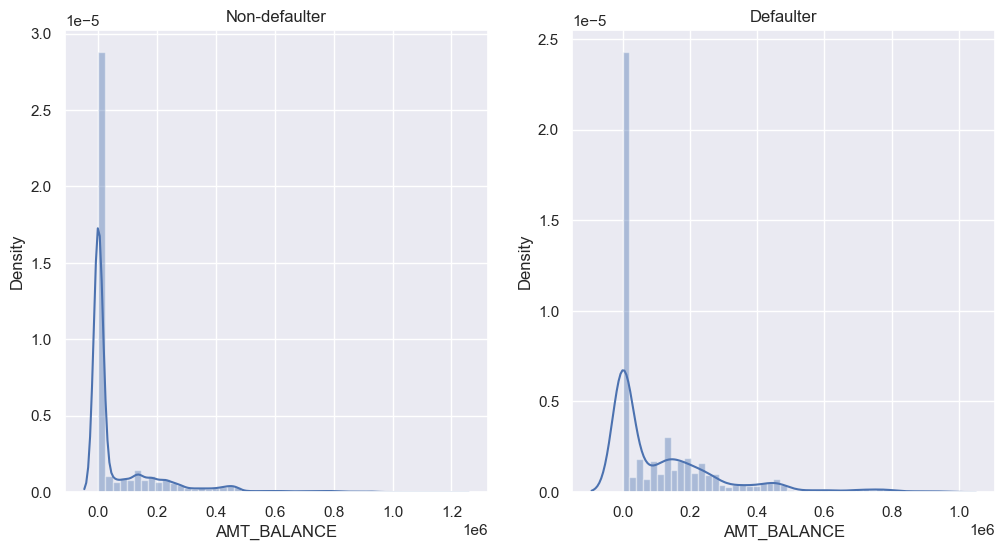

In [23]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_BALANCE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_BALANCE'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\swift\AppData\Local\Temp\ipykernel_16652\3219810853.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_CREDIT_LIMIT_ACTUAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
C:\Users\swift\AppData\Local\Temp\ipykernel_16652\3219810853.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

[Text(0.5, 1.0, 'Defaulter')]

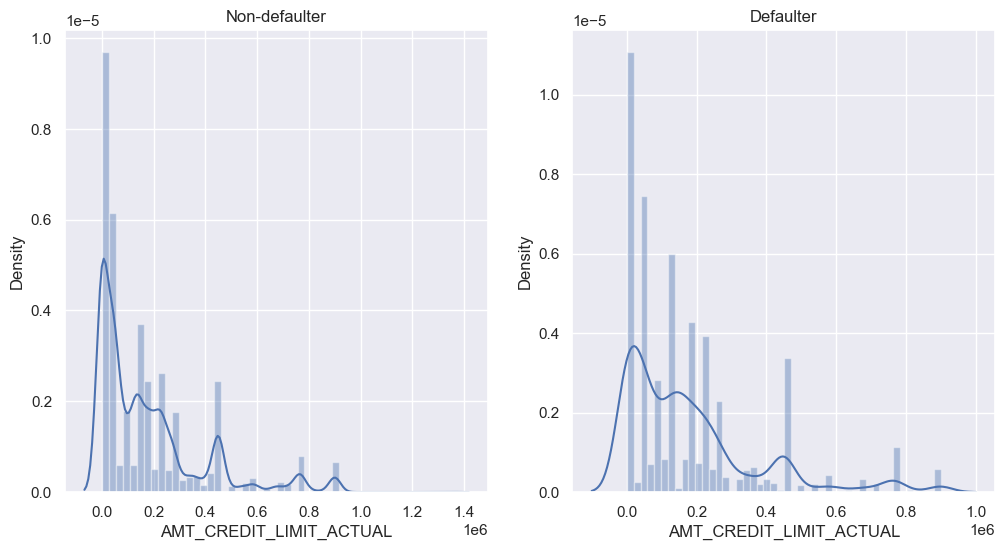

In [24]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_CREDIT_LIMIT_ACTUAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_CREDIT_LIMIT_ACTUAL'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\swift\AppData\Local\Temp\ipykernel_16652\123929311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECEIVABLE_PRINCIPAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
C:\Users\swift\AppData\Local\Temp\ipykernel_16652\123929311.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4

[Text(0.5, 1.0, 'Defaulter')]

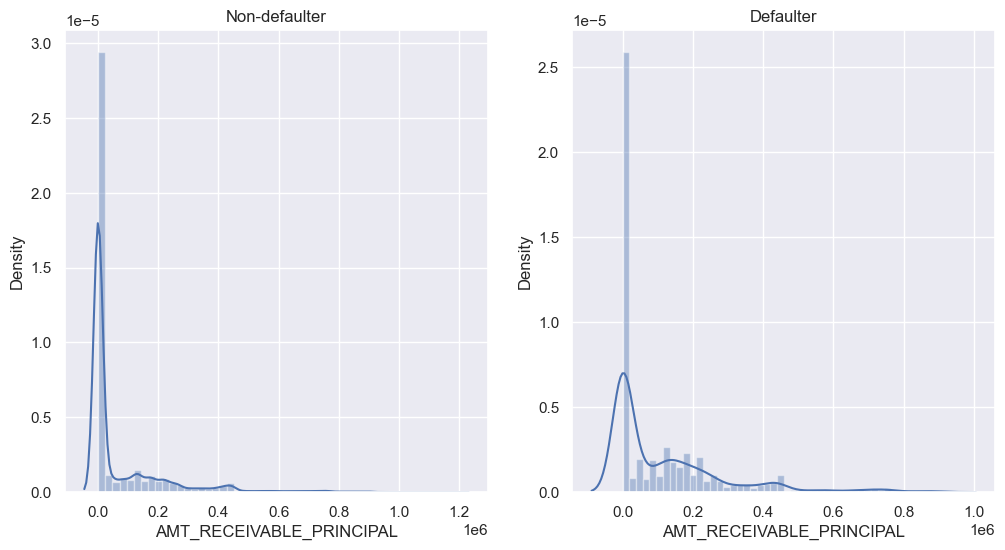

In [25]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECEIVABLE_PRINCIPAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_RECEIVABLE_PRINCIPAL'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\swift\AppData\Local\Temp\ipykernel_16652\1368158570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
C:\Users\swift\AppData\Local\Temp\ipykernel_16652\1368158570.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

[Text(0.5, 1.0, 'Defaulter')]

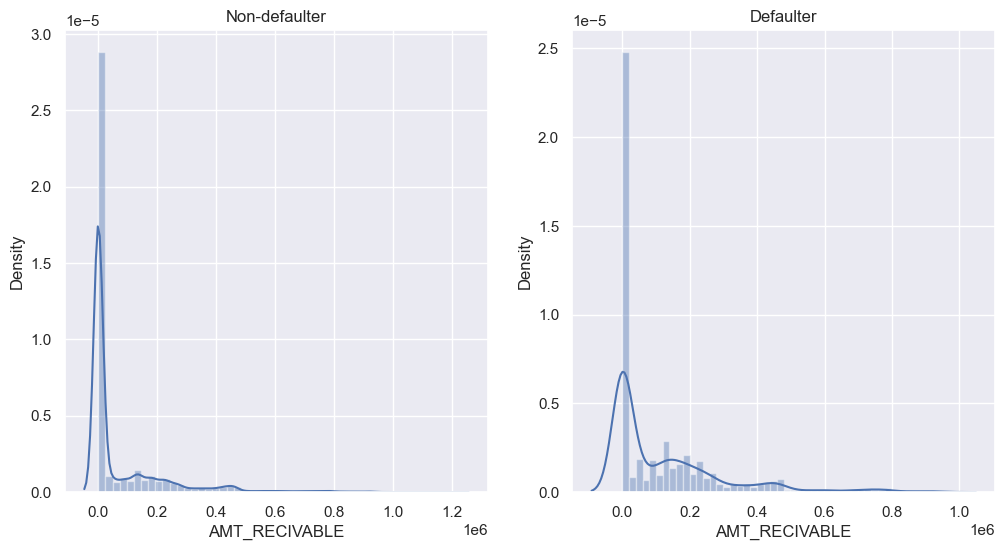

In [26]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_RECIVABLE'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\swift\AppData\Local\Temp\ipykernel_16652\2733345202.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_TOTAL_RECEIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
C:\Users\swift\AppData\Local\Temp\ipykernel_16652\2733345202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

[Text(0.5, 1.0, 'Defaulter')]

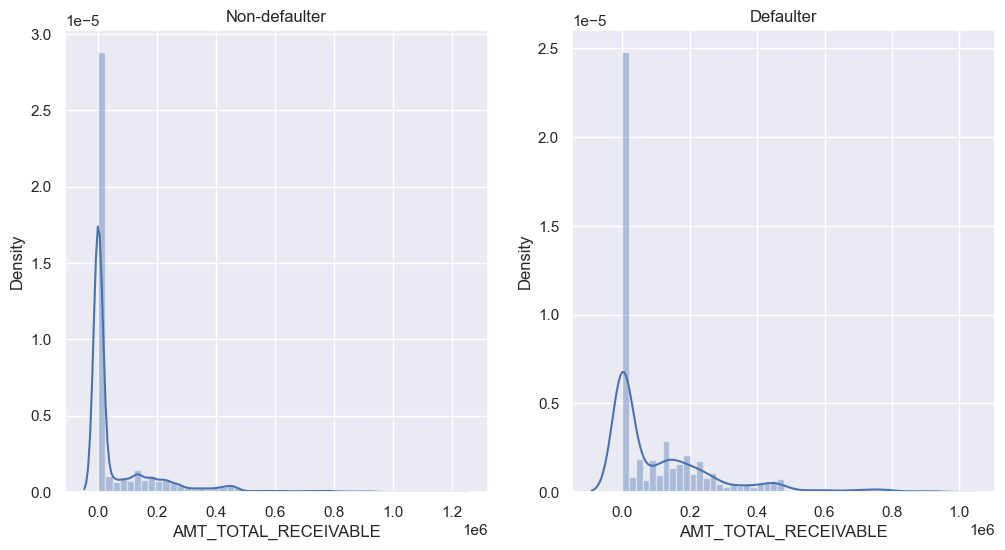

In [27]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_TOTAL_RECEIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_TOTAL_RECEIVABLE'].dropna(), ax= ax[1]).set(title = "Defaulter")

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

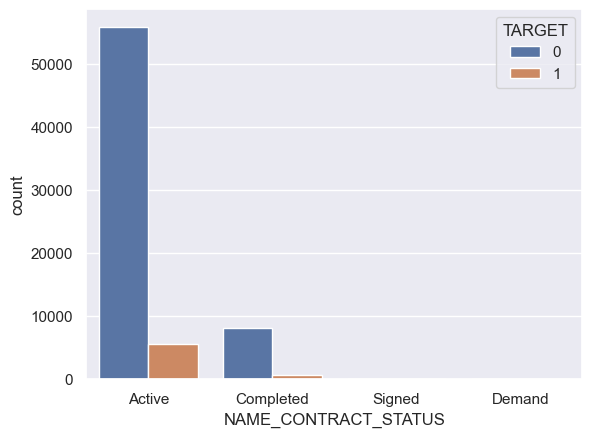

In [31]:
sns.countplot(data=CCBL_merged,x=CCBL_merged['NAME_CONTRACT_STATUS'], hue='TARGET' )


In [35]:
def plot_normalized_stacked_bar_chart(data, category_col, binary_col):
    '''
    input: 
        data: dataframe
        category_col: categorycal column
        binary_Col: target column
    '''
    grouped = data.groupby(category_col)[binary_col].value_counts(normalize=True).unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title('Normalized Stacked Bar Chart')
    plt.xlabel(category_col)
    plt.ylabel('Percentage')
    plt.show()

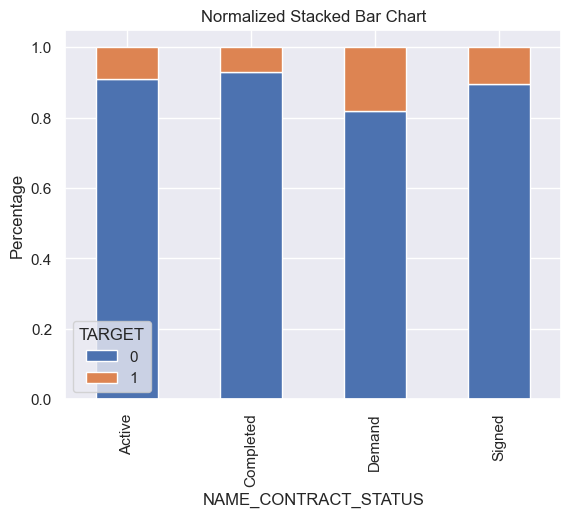

In [36]:
plot_normalized_stacked_bar_chart(CCBL_merged,"NAME_CONTRACT_STATUS", "TARGET")

###NAME_CONTRACT_STATUS "Completed" and "Active" has less chance of defaulting. Borrowers with active contracts are currently engaged in the loan repayment process. For contracts marked as "completed," the borrower has already successfully fulfilled their loan obligations and repaid the debt in full. 

[INFO] creating woe binning ...


C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\swift\AppDa

Binning on 246470 rows and 23 columns in 00:00:30


C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'CNT_DRAWINGS_ATM_CURRENT': <Figure size 640x480 with 2 Axes>,
 'CNT_INSTALMENT_MATURE_CUM': <Figure size 640x480 with 2 Axes>,
 'AMT_BALANCE': <Figure size 640x480 with 2 Axes>,
 'AMT_PAYMENT_CURRENT': <Figure size 640x480 with 2 Axes>,
 'AMT_RECEIVABLE_PRINCIPAL': <Figure size 640x480 with 2 Axes>,
 'AMT_DRAWINGS_OTHER_CURRENT': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT_LIMIT_ACTUAL': <Figure size 640x480 with 2 Axes>,
 'Completed_Count': <Figure size 640x480 with 2 Axes>,
 'AMT_PAYMENT_TOTAL_CURRENT': <Figure size 640x480 with 2 Axes>,
 'MONTHS_BALANCE': <Figure size 640x480 with 2 Axes>,
 'AMT_TOTAL_RECEIVABLE': <Figure size 640x480 with 2 Axes>,
 'AMT_DRAWINGS_ATM_CURRENT': <Figure size 640x480 with 2 Axes>,
 'AMT_RECIVABLE': <Figure size 640x480 with 2 Axes>,
 'CNT_DRAWINGS_OTHER_CURRENT': <Figure size 640x480 with 2 Axes>,
 'AMT_DRAWINGS_CURRENT': <Figure size 640x480 with 2 Axes>,
 'AMT_DRAWINGS_POS_CURRENT': <Figure size 640x480 with 2 Axes>,
 'CNT_DRAWINGS_CURRENT': <F

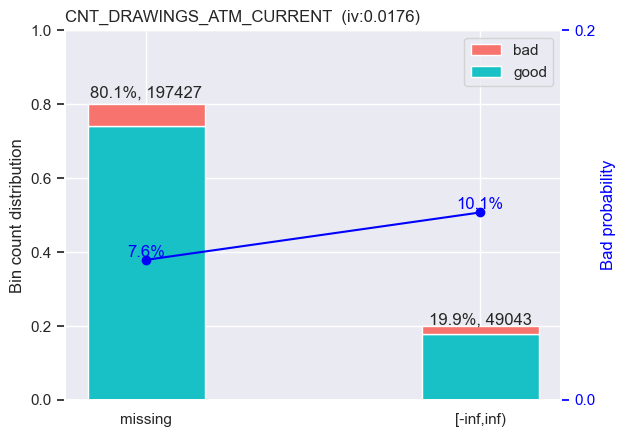

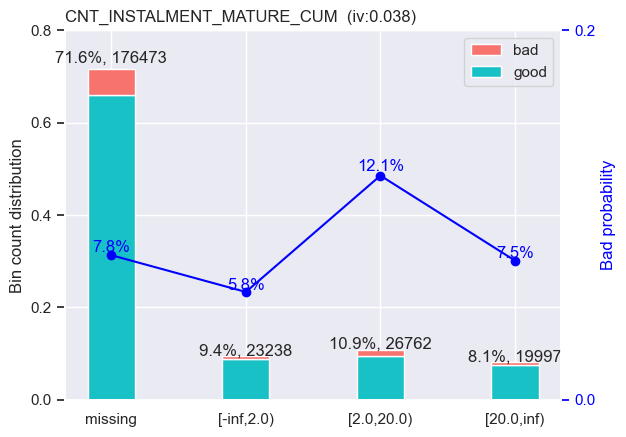

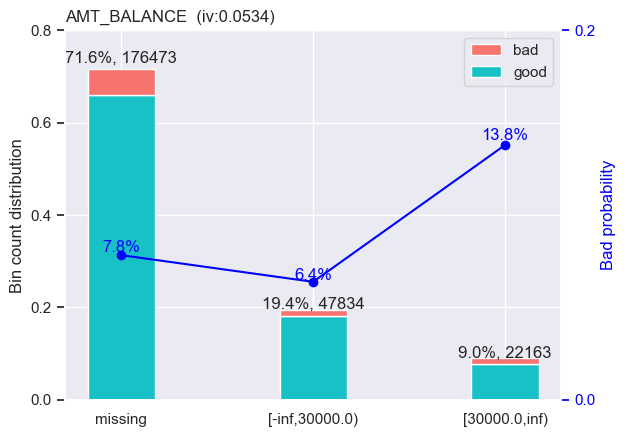

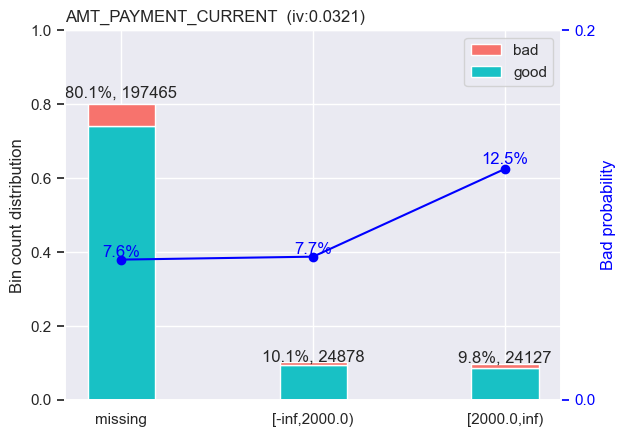

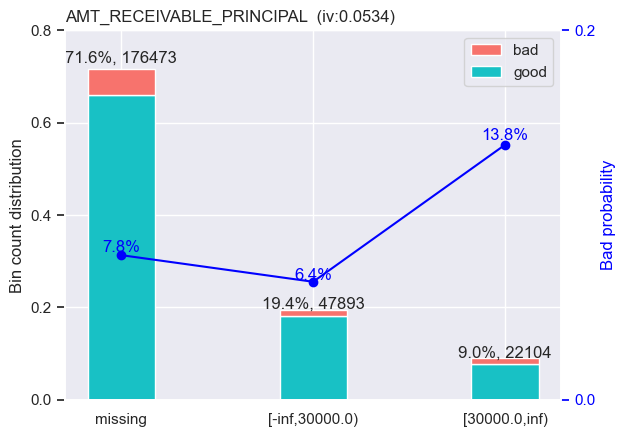

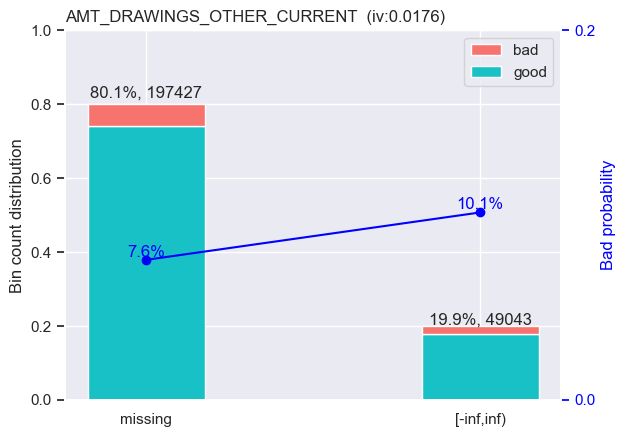

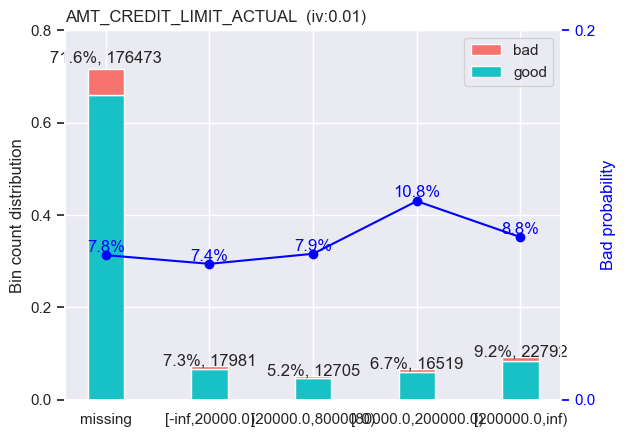

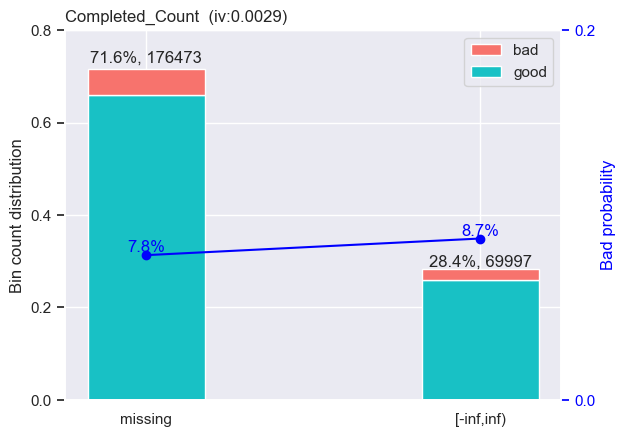

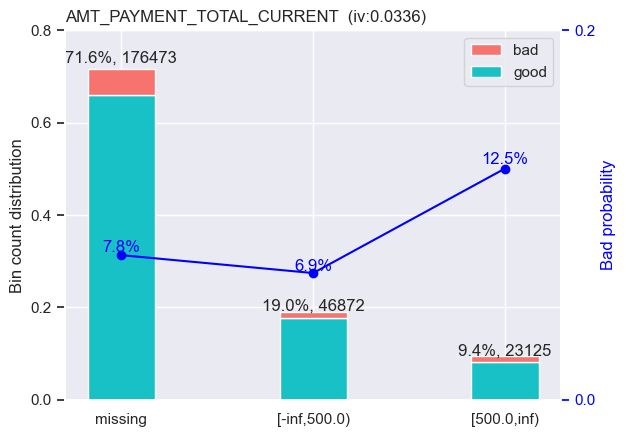

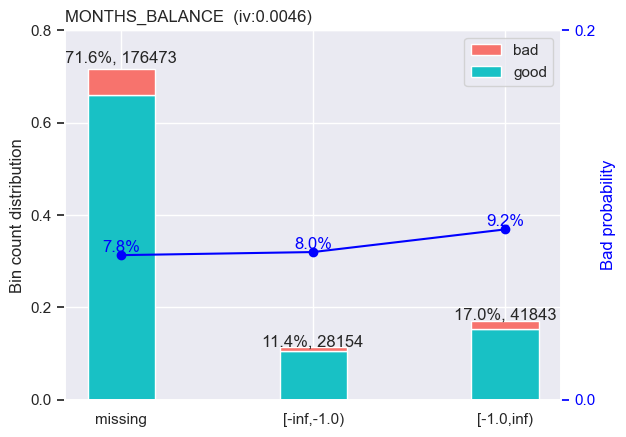

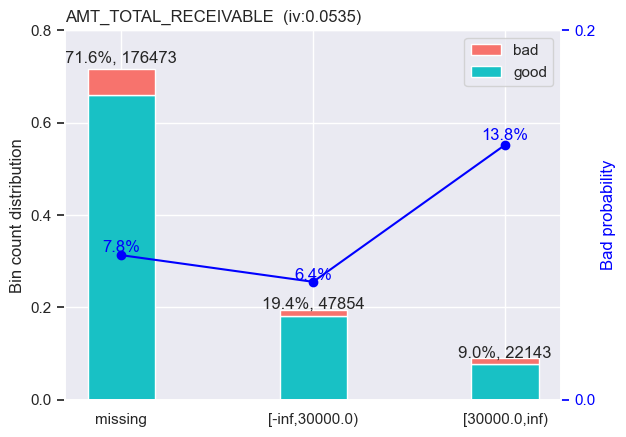

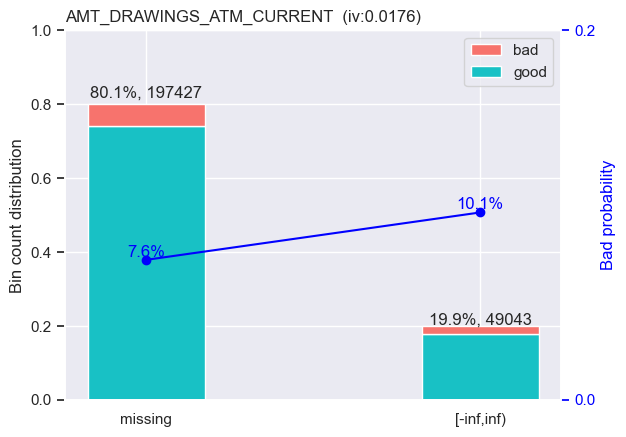

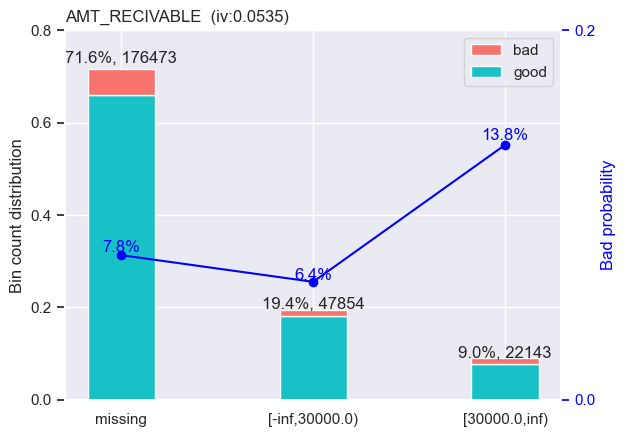

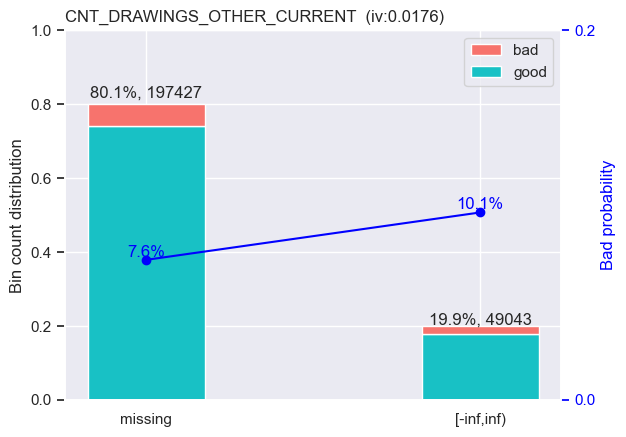

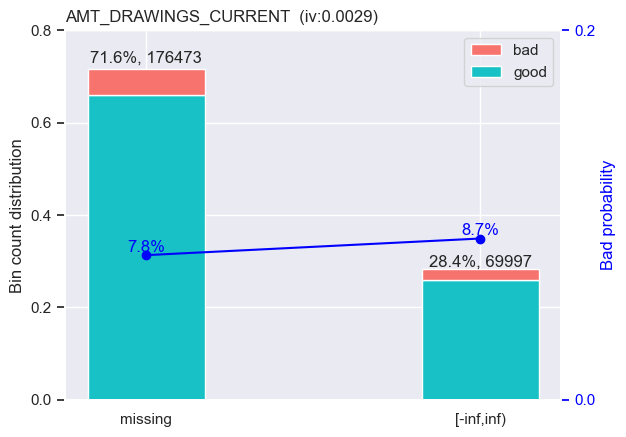

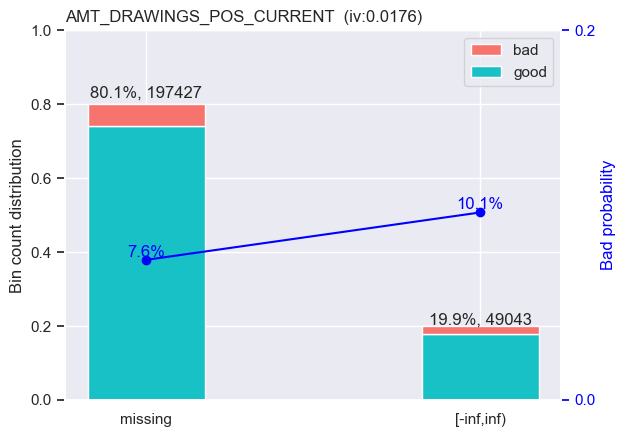

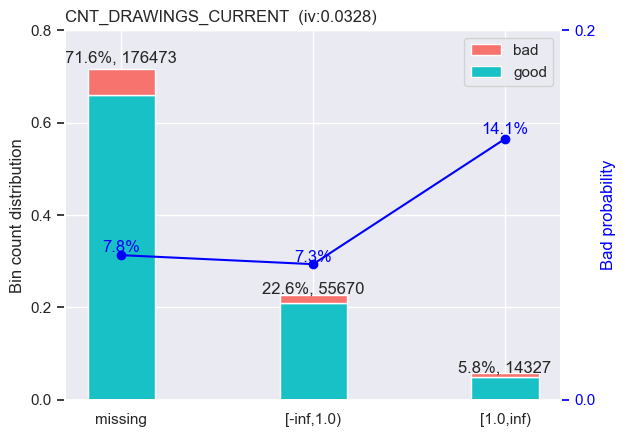

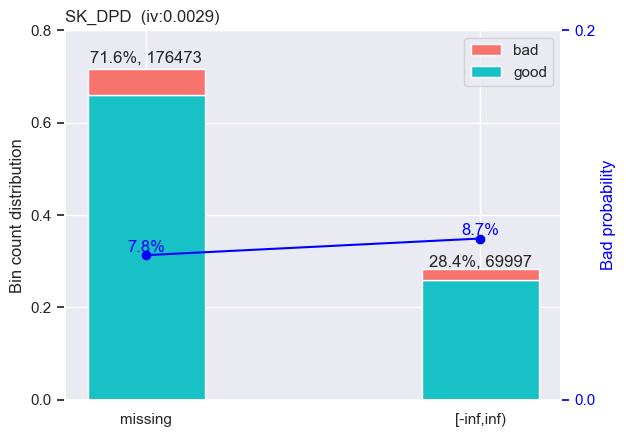

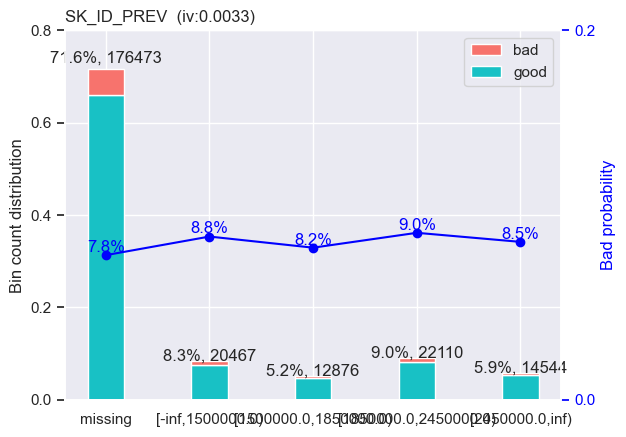

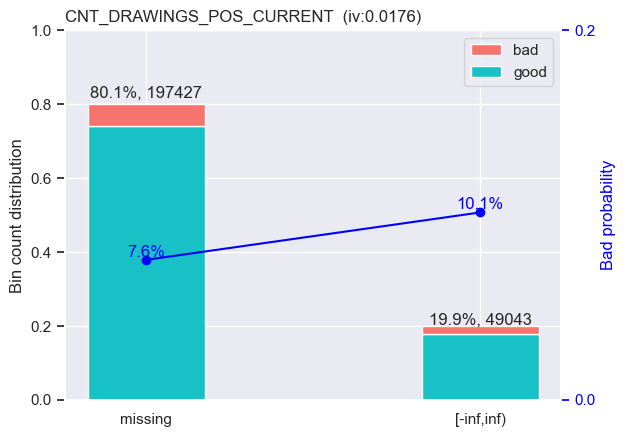

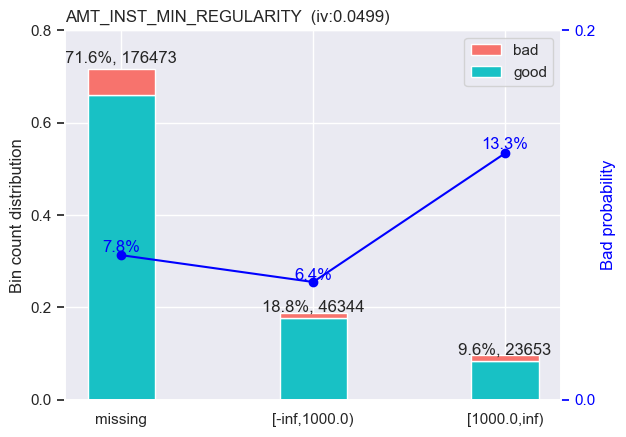

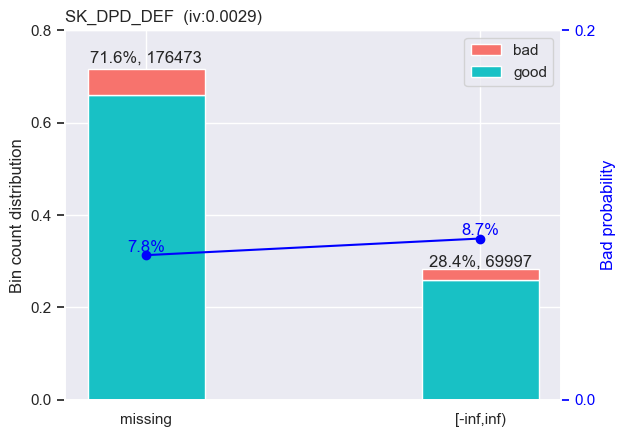

In [39]:
import scorecardpy as sc

bins = sc.woebin(CCBL_merged.drop(columns = ["NAME_CONTRACT_STATUS","SK_ID_CURR"]), y="TARGET")
sc.woebin_plot(bins)

AMT_RECEIVABLE_PRINCIPAL, AMT_TOTAL_RECEIVABLE	
The higher AMT_RECEIVABLE_PRINCIPAL, AMT_TOTAL_RECEIVABLE are, the more likely to pay their current loan on time. 6.4% of AMT_RECEIVABLE_PRINCIPAL, AMT_TOTAL_RECEIVABLE less than 30000 are tagged 1, compared to 13.8% of the customers with Amount receivable for principal greater than 30000.

AMT_PAYMENT_TOTAL_CURRENT
The higher AMT_PAYMENT_TOTAL_CURRENT are, the more likely to pay their current loan on time. 6.9% of AMT_PAYMENT_TOTAL_CURRENT less than 500 are tagged 1, compared to 12.5% of the customers with pay during the month in total on the previous credit greater than 500.